## 실습 1

In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [2]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [3]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

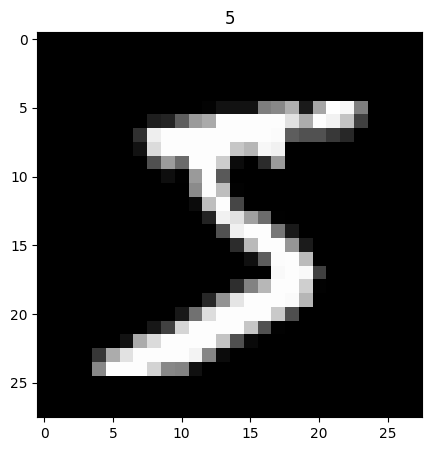

In [4]:
import matplotlib.pyplot as plt
# 이미지 그릴 박스크기 설정
fig, axes = plt.subplots(1, 1)
fig.set_size_inches(10, 5)
axes.imshow(x_train[0], cmap='gray')
axes.set_title(str(y_train[0]))
plt.show()

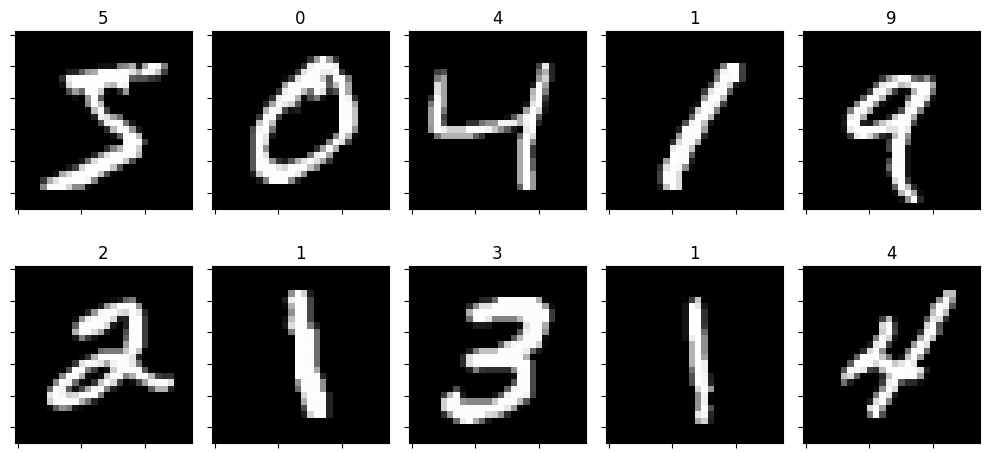

In [5]:
fig, axes = plt.subplots(2, 5)
fig.set_size_inches(10, 5)
for i in range(10):
  axes[i//5, i%5].imshow(x_train[i],cmap='gray')
  axes[i//5, i%5].set_title(str(y_train[i]))
  plt.setp(axes[i//5, i%5].get_xticklabels(), visible=False)
  plt.setp(axes[i//5, i%5].get_yticklabels(), visible=False)

plt.tight_layout() # 자동으로 여백 조정
plt.show()

In [6]:
x_train = x_train.reshape(60000, 28, 28, 1) # 만약에 컬러 데이터라면? 1 -> 3
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train/255.0
x_test = x_test/255.0
x_train[0]
# MNIST data는 각 픽셀이 0 ~ 255사이의 정수값을 가진다.
# 이런 이미지의 경우 보통 255로 나누어 0 ~ 1사이 값으로 정규화를 한다.
# 표준화는 아니지만, 양수값으로 이루어진 이미지 전처리(scaling)에 주로 사용되는 방법이다.

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(5, 3, strides = 1, padding = 'same', activation = 'relu', input_shape = (28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax')) # 0 ~ 9 로 카테고리가 총 10개

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

In [8]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 32s 16ms/step - loss: 0.2455 - acc: 0.9291 - val_loss: 0.1140 - val_acc: 0.9634
Epoch 2/10
1875/1875 [==============================] - 22s 11ms/step - loss: 0.0901 - acc: 0.9735 - val_loss: 0.0793 - val_acc: 0.9763
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0625 - acc: 0.9811 - val_loss: 0.0523 - val_acc: 0.9821
Epoch 4/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0474 - acc: 0.9853 - val_loss: 0.0525 - val_acc: 0.9827
Epoch 5/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0377 - acc: 0.9879 - val_loss: 0.0566 - val_acc: 0.9818
Epoch 6/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0313 - acc: 0.9902 - val_loss: 0.0496 - val_acc: 0.9838
Epoch 7/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0243 - acc: 0.9920 - val_loss: 0.0486 - val_acc: 0.9840
Epoch 8/10
1875/1875 [==========================

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(test_loss)
print(test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.0521 - acc: 0.9845
0.05212841182947159
0.984499990940094


## 실습 2

In [10]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [11]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

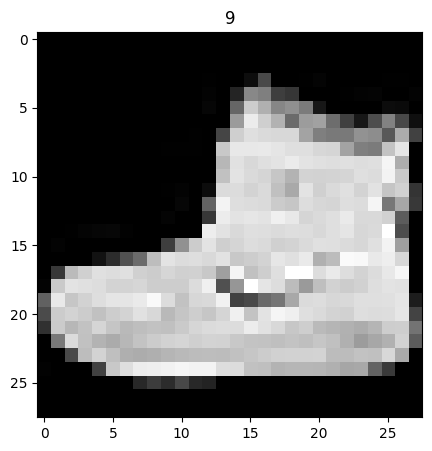

In [12]:
# 이미지 그릴 박스크기 설정
fig, axes = plt.subplots(1, 1)
fig.set_size_inches(10, 5)
axes.imshow(x_train[0], cmap='gray')
axes.set_title(str(y_train[0]))
plt.show()

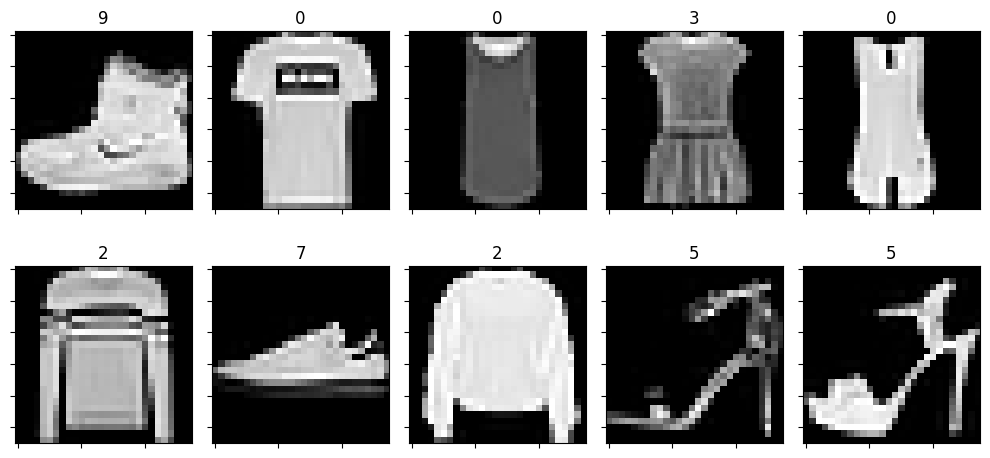

In [13]:
fig, axes = plt.subplots(2, 5)
fig.set_size_inches(10, 5)
for i in range(10):
  axes[i//5, i%5].imshow(x_train[i],cmap='gray')
  axes[i//5, i%5].set_title(str(y_train[i]))
  plt.setp(axes[i//5, i%5].get_xticklabels(), visible=False)
  plt.setp(axes[i//5, i%5].get_yticklabels(), visible=False)

plt.tight_layout() # 자동으로 여백 조정
plt.show()

In [14]:
x_train = x_train.reshape(60000, 28, 28, 1) # 만약에 컬러 데이터라면? 1 -> 3
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train/255.0
x_test = x_test/255.0
x_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [15]:
model = Sequential()
model.add(Conv2D(5, 3, strides = 1, padding = 'same', activation = 'relu', input_shape = (28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax')) # 0 ~ 9 로 카테고리가 총 10개

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

In [16]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 24s 12ms/step - loss: 0.4483 - acc: 0.8420 - val_loss: 0.3766 - val_acc: 0.8612
Epoch 2/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3132 - acc: 0.8881 - val_loss: 0.3153 - val_acc: 0.8869
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2753 - acc: 0.9004 - val_loss: 0.3068 - val_acc: 0.8869
Epoch 4/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2502 - acc: 0.9096 - val_loss: 0.2967 - val_acc: 0.8949
Epoch 5/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2323 - acc: 0.9152 - val_loss: 0.2981 - val_acc: 0.8914
Epoch 6/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2160 - acc: 0.9200 - val_loss: 0.2950 - val_acc: 0.8904
Epoch 7/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2013 - acc: 0.9254 - val_loss: 0.2755 - val_acc: 0.9012
Epoch 8/10
1875/1875 [==========================

In [17]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(test_loss)
print(test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.2849 - acc: 0.9014
0.2848563492298126
0.9014000296592712


## 실습 03

In [18]:
# 온라인 상에 있는 데이터를 받아오기 위해 필요한 모듈 import
import urllib.request
import os
import zipfile

url1=  'https://storage.googleapis.com/download.tensorflow.org/data/rps.zip '
urllib.request.urlretrieve(url1, 'rps.zip')
url2 =  'https://storage.googleapis.com/download.tensorflow.org/data/rps-test-set.zip '
urllib.request.urlretrieve(url2, 'rps-test-set.zip')

local_zip = 'rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/')
zip_ref.close()

local_zip = 'rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/')
zip_ref.close()

# 2. Data Preprocessing
rock_dir = os.path.join('./tmp/rps/rock')
paper_dir = os.path.join('./tmp/rps/paper')
scissors_dir = os.path.join('./tmp/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
paper_files = os.listdir(paper_dir)
scissors_files = os.listdir(scissors_dir)

total training rock images: 840
total training paper images: 840
total training scissors images: 840


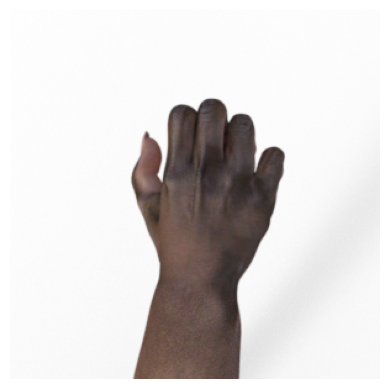

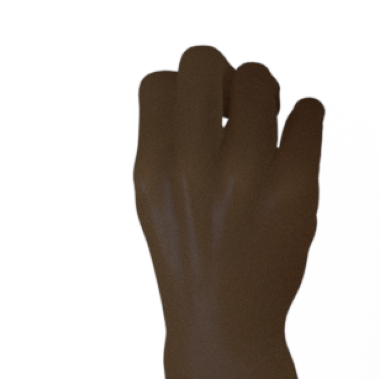

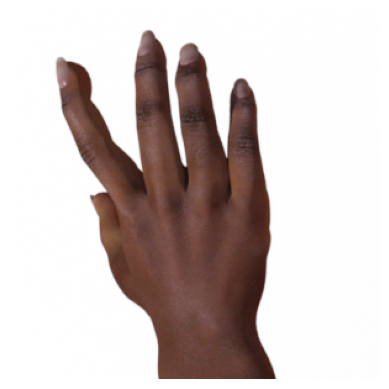

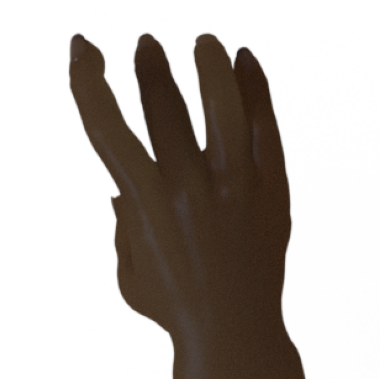

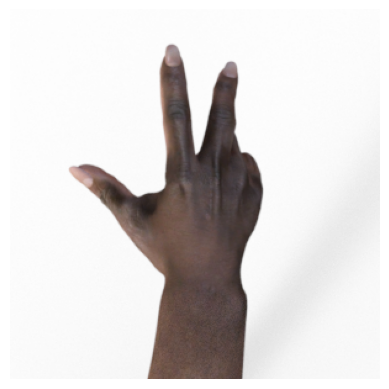

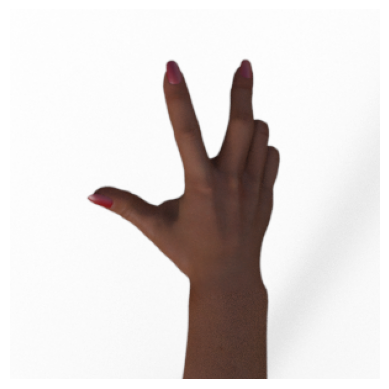

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname)
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname)
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname)
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [20]:
!pip install keras_preprocessing

In [21]:
from tensorflow.python.ops.gen_array_ops import tensor_strided_slice_update
import keras_preprocessing
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = 'tmp/rps/'
TEST_DIR = 'tmp/rps-test-set/'

training_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = training_datagen.flow_from_directory(TRAINING_DIR, target_size = (150, 150), class_mode = 'categorical')

test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory(TEST_DIR, target_size = (150, 150), class_mode = 'categorical')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [22]:
model = Sequential()
model.add(Conv2D(5, (3, 3), strides = 1, padding = 'same', input_shape = (150, 150, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics=['acc'])

In [23]:
model.fit(train_generator, epochs = 10)

Epoch 1/10
79/79 [==============================] - 39s 482ms/step - loss: 4.5758 - acc: 0.4675
Epoch 2/10
79/79 [==============================] - 25s 314ms/step - loss: 0.3889 - acc: 0.8937
Epoch 3/10
79/79 [==============================] - 25s 320ms/step - loss: 0.1165 - acc: 0.9821
Epoch 4/10
79/79 [==============================] - 25s 323ms/step - loss: 0.0331 - acc: 0.9929
Epoch 5/10
79/79 [==============================] - 25s 317ms/step - loss: 0.0165 - acc: 0.9976
Epoch 6/10
79/79 [==============================] - 24s 304ms/step - loss: 0.0180 - acc: 0.9952
Epoch 7/10
79/79 [==============================] - 25s 314ms/step - loss: 0.0184 - acc: 0.9937
Epoch 8/10
79/79 [==============================] - 26s 334ms/step - loss: 8.5169e-04 - acc: 1.0000
Epoch 9/10
79/79 [==============================] - 24s 302ms/step - loss: 0.0271 - acc: 0.9925
Epoch 10/10
79/79 [==============================] - 25s 319ms/step - loss: 0.0076 - acc: 0.9976


In [24]:
model.evaluate(test_generator)

12/12 [==============================] - 3s 213ms/step - loss: 1.0153 - acc: 0.7231


[1.0153099298477173, 0.7231183052062988]